In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [179]:
class DNN:
    
    def __init__(self, layers, iters=2500, lr=0.001):
        self.layers = layers
        self.iters = iters
        self.lr = lr
        self.W, self.B = {}, {}
        self.A, self.Z = {}, {}
        self.PA, self.PZ = {}, {}
        self.dw, self.db, self.dz = {}, {}, {}
        self.x, self.y, self.m, self.predictions = None, None, None, None
        self.epsilon = 1e-7
        self.costs = []
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def diff_relu(self, z):
        return np.where(z<=0, 0, 1)
        
    def initialize_weights(self):
        for i in range(1, len(self.layers)):
            self.W['W'+str(i)] = np.random.random((self.layers[i], self.layers[i-1]))*np.sqrt(2/self.layers[i-1])
            self.B['B'+str(i)] = np.random.random((self.layers[i], 1))
        
    def forward_propagation(self):
        for i in range(1, len(self.layers)):
            self.Z['Z'+str(i)] = self.W['W'+str(i)]@self.A['A'+str(i-1)] + self.B['B'+str(i)]
            if i==len(self.layers)-1:
                self.A['A'+str(i)] = self.sigmoid(self.Z['Z'+str(i)])
            else:
                self.A['A'+str(i)] = self.relu(self.Z['Z'+str(i)])
                           
    def backward_propagation(self):
        for i in range(1, len(self.layers))[::-1]:
            if i==len(self.layers)-1:
                self.dz['dz'+str(i)] = self.A['A'+str(i)] - self.y
            else:
                self.dz['dz'+str(i)] = (self.W['W'+str(i+1)].T@self.dz['dz'+str(i+1)])*self.diff_relu(self.Z['Z'+str(i)])
            self.dw['dw'+str(i)] = (self.dz['dz'+str(i)]@self.A['A'+str(i-1)].T)/self.m
            self.db['db'+str(i)] = np.sum(self.dz['dz'+str(i)], axis=1, keepdims=True)/self.m
            
    
    def optimize_weights(self):
        for _ in range(self.iters):
            self.forward_propagation()
            self.backward_propagation()
            for i in range(1, len(self.layers)):
                self.W['W'+str(i)] -= self.lr*self.dw['dw'+str(i)]
                self.B['B'+str(i)] -= self.lr*self.db['db'+str(i)]
                self.costs.append(self.compute_cost())
            
                
    def compute_cost(self):
        term1 = -y*np.log(self.A['A'+str(len(self.layers)-1)]+self.epsilon)
        term2 = -(1-y)*np.log(1-self.A['A'+str(len(self.layers)-1)]+self.epsilon)
        cost = float(np.sum(term1+term2)/self.m)
        return cost
    
    def fit(self, x, y):
        self.x = x.T
        self.y = y
        self.m = self.y.size
        self.A['A0'] = self.x
        
        self.initialize_weights()
        self.optimize_weights()
        
    def predict(self, x):
        for i in range(1, len(self.layers)):
            if i==1:
                self.PZ['PZ'+str(i)] = np.dot(self.W['W'+str(i)], x.T)+self.B['B'+str(i)]
            else:
                self.PZ['PZ'+str(i)] = np.dot(self.W['W'+str(i)], self.PZ['PZ'+str(i-1)])+self.B['B'+str(i)]
            if i==len(self.layers)-1:
                self.PA['PA'+str(i)] = self.sigmoid(self.Z['Z'+str(i)])
            self.PA['PA'+str(i)] = self.relu(self.PZ['PZ'+str(i)])
        self.predictions = np.round(self.A['A'+str(len(self.layers)-1)])
        return self.predictions

In [187]:
data = pd.read_csv('Social_Network_Ads.csv')
x = data.iloc[:, [2,3]].values
y = data.iloc[:, -1].values
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
nn = DNN(layers=[2,10,2, 1, 12, 8,1], lr=0.04)

In [188]:
nn.fit(x, y)

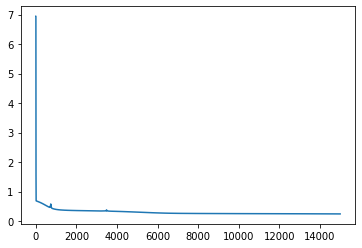

In [189]:
plt.plot(nn.costs)

In [190]:
preds = nn.predict(x)

In [192]:
(np.sum(y==preds)/y.size)*100

89.5